# Elaborato di MACHINE LEARNING
Megna Lorenzo: 868929

Molinari Lorenzo: 911610

Trippetta Massimo: 869286

## Import di tutti i pacchetti utilizzati e Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
import sklearn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import keras
from keras.models import Sequential
from keras.layers import Dense
import tqdm
from imblearn.metrics import specificity_score
from sklearn import svm
import scipy.stats as st
from tqdm import tqdm
import time
import keras
from sklearn.metrics import roc_curve, roc_auc_score

Passiamo a caricare il dataset:

In [ ]:
nome_file = "/content/drive/MyDrive/Magistrale informatica/Machine Learning/ELABORAT0_ML/df_diabetici.csv"
data = pd.read_csv(nome_file)
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


Variabili:
- gender : Il genere si riferisce al sesso biologico dell’individuo, che può avere un impatto sulla sua suscettibilità al diabete.
- age : L’età è un fattore importante poiché il diabete viene diagnosticato più comunemente negli anziani. Nel nostro set di dati l’età varia da 0 a 80 anni.
- hypertension: L’ipertensione è una condizione medica in cui la pressione sanguigna nelle arterie è costantemente elevata. Ha valori 0 o 1 dove 0 indica che non hanno ipertensione e per 1 significa che hanno ipertensione.
- heart_disease: Le malattie cardiache sono un’altra condizione medica associata ad un aumentato rischio di sviluppare il diabete. Ha valori 0 o 1 dove 0 indica che non hanno malattie cardiache e per 1 significa che hanno malattie cardiache.
- smoking_history: Anche l'abitudine al fumo è considerata un fattore di rischio per il diabete e può esacerbare le complicazioni associate al diabete. Nel nostro set di dati abbiamo 5 categorie: not current,former,No Info,current,never and ever.
- bmi: Il BMI (indice di massa corporea) è una misura del grasso corporeo in base al peso e all'altezza. Valori BMI più elevati sono collegati a un rischio più elevato di diabete. L'intervallo di BMI nel set di dati va da 10,16 a 71,55. Un BMI inferiore a 18,5 indica sottopeso, 18,5-24,9 è normale, 25-29,9 è sovrappeso e 30 o più è obeso.
- HbA1c_level: Il livello di HbA1c (emoglobina A1c) è una misura del livello medio di zucchero nel sangue di una persona negli ultimi 2-3 mesi. Livelli più elevati indicano un rischio maggiore di sviluppare il diabete. Per lo più più del 6,5% del livello di HbA1c indica il diabete.
- blood_glucose_level: Il livello di glucosio nel sangue si riferisce alla quantità di glucosio nel flusso sanguigno in un dato momento. Livelli elevati di glucosio nel sangue sono un indicatore chiave del diabete.
- diabetes:Il diabete è la variabile target prevista, con valori pari a 1 che indica la presenza di diabete e 0 che indica l'assenza di diabete.

Ora cambiamo la tipologia delle variabili

In [ ]:
data["diabetes"] = data["diabetes"].astype("category")
data["blood_glucose_level"] = data["blood_glucose_level"].astype("int16")
data["HbA1c_level"] = data["HbA1c_level"].astype("float32")
data["bmi"] = data["bmi"].astype("float32")
data["age"] = data["age"].astype("int16")
data["hypertension"] = data["hypertension"].astype("category")
data["heart_disease"] = data["heart_disease"].astype("category")
data["gender"] = data["gender"].astype("category")
data["smoking_history"] = data["smoking_history"].astype("category")
data.dtypes

gender                 category
age                       int16
hypertension           category
heart_disease          category
smoking_history        category
bmi                     float32
HbA1c_level             float32
blood_glucose_level       int16
diabetes               category
dtype: object

## Analisi Esplorative

In [ ]:
data.describe()

,age,bmi,HbA1c_level,blood_glucose_level
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.875660,27.320768,5.527507,138.058060
std,22.535417,6.636784,1.070672,40.708136
min,0.000000,10.010000,3.500000,80.000000
25%,24.000000,23.629999,4.800000,100.000000
50%,43.000000,27.320000,5.800000,140.000000
75%,60.000000,29.580000,6.200000,159.000000
max,80.000000,95.690002,9.000000,300.000000


In [ ]:
data.diabetes.value_counts(normalize=True)

0    0.915
1    0.085
Name: diabetes, dtype: float64

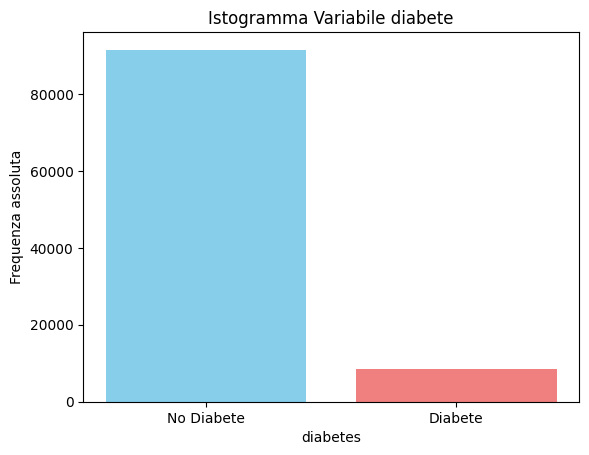

In [ ]:
# Define the colors for binary values (0 and 1)
colors = ['skyblue', 'lightcoral']

# Create a stacked bar chart
plt.bar([0, 1], data['diabetes'].value_counts(), color=colors)

# Add labels and title
plt.xlabel("diabetes")
plt.ylabel("Frequenza assoluta")
plt.title("Istogramma Variabile diabete")

# Customize x-axis ticks
plt.xticks([0, 1], ['No Diabete', 'Diabete'])

# Show the plot
plt.show()

dato che la nostra variabile target non è distribuita in modo equo faremo oversampling e undersampling per cercare di livellarla un pò

In [ ]:
data.groupby(by=['smoking_history','diabetes']).smoking_history.count()

smoking_history  diabetes
No Info          0           34362
                 1            1454
current          0            8338
                 1             948
ever             0            3532
                 1             472
former           0            7762
                 1            1590
never            0           31749
                 1            3346
not current      0            5757
                 1             690
Name: smoking_history, dtype: int64

La variabile smoking_history ha 35.000 valori ugali a no info, questo ci fa perdere tantissime informazioni, possiamo considerarli come dati  mancanti, decidiamo di toglierla

In [ ]:
data= data[['gender', 'age', 'hypertension', 'heart_disease',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]

In [ ]:
data.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80,0,1,25.190001,6.6,140,0
1,Female,54,0,0,27.320000,6.6,80,0
2,Male,28,0,0,27.320000,5.7,158,0
3,Female,36,0,0,23.450001,5.0,155,0
4,Male,76,1,1,20.139999,4.8,155,0


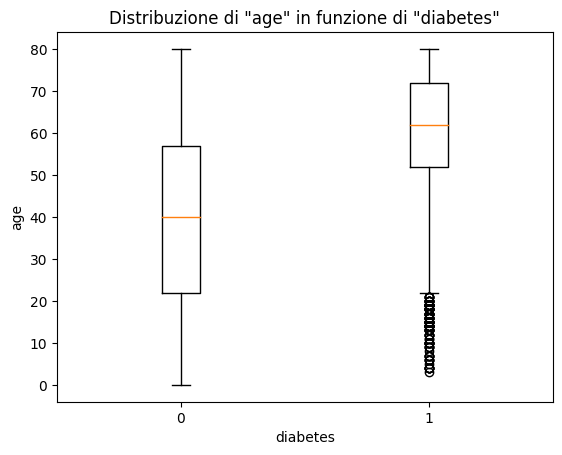

In [ ]:
data_to_plot = {
    '0': data[data['diabetes'] == 0]['age'],
    '1': data[data['diabetes'] == 1]['age']
}

# Crea il grafico a boxplot
fig, ax = plt.subplots()
ax.boxplot(data_to_plot.values())
ax.set_xticklabels(data_to_plot.keys())
ax.set_ylabel('age')
ax.set_xlabel('diabetes')
plt.title("Distribuzione di \"age\" in funzione di \"diabetes\"")
plt.show()

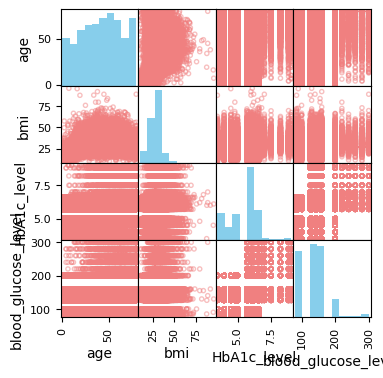

In [ ]:
scatter_matrix= pd.plotting.scatter_matrix(data, figsize=(4,4), c='none', edgecolor='lightcoral', hist_kwds={'color': 'skyblue'})

<ipython-input-13-1741cc9f2e48>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), vmin=-0.3, vmax=0.6, center=0, annot=True, fmt='.2f', mask=~np.tri(data.corr().shape[1], k=-1, dtype=bool), cbar=True, cmap='coolwarm')


<Axes: >

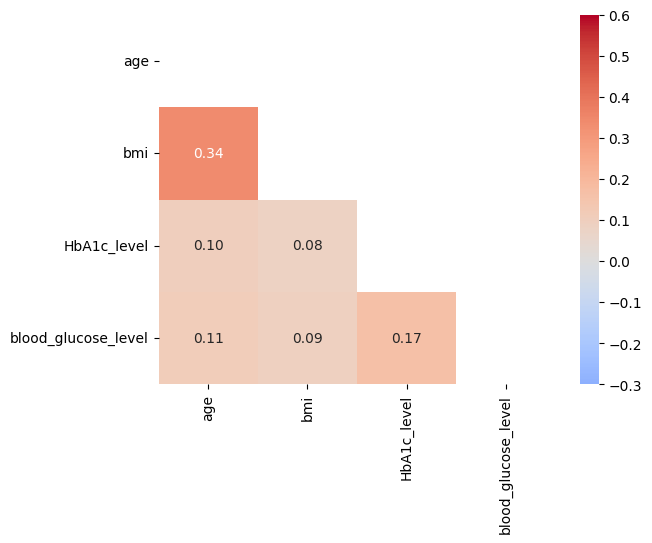

In [ ]:
sns.heatmap(data.corr(), vmin=-0.3, vmax=0.6, center=0, annot=True, fmt='.2f', mask=~np.tri(data.corr().shape[1], k=-1, dtype=bool), cbar=True, cmap='coolwarm')

## Creazione set di train, validation, final test set

### Creiamo il final_test_set:

In [ ]:
final_test_set = data.sample(frac = 0.10)

for indici in final_test_set.index:
  data.drop(indici, inplace = True, axis = 0)

final_test_set = final_test_set[['gender', 'hypertension', 'heart_disease', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes']]

label_encoder = LabelEncoder()
for col in ['gender', 'hypertension', 'heart_disease']:
    final_test_set[col] = label_encoder.fit_transform(final_test_set[col])
final_test_set.head()  #0=female, 1=male

X_final_test_set = final_test_set[['gender', 'hypertension', 'heart_disease', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level']]
y_final_test_set = final_test_set[['diabetes']]


final_test_set.head(3)

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level,diabetes
80386,0,0,0,80,33.470001,6.5,240,1
16803,0,0,0,16,18.010000,6.2,158,0
73280,0,0,0,60,18.540001,4.0,158,0


In [ ]:
X_final_test_set.head(3)

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level
80386,0,0,0,80,33.470001,6.5,240
16803,0,0,0,16,18.010000,6.2,158
73280,0,0,0,60,18.540001,4.0,158


In [ ]:
y_final_test_set

,diabetes
80386,1
16803,0
73280,0
84056,0
18168,0
...,...
23691,0
67944,0
42882,0
81672,1


Dato che il nostro dataset è sbilanciato, l'idea è quella di effettuare prima un oversampling sui casi di diabete (quindi dove la variabuile diabete è uguale a 1). Successivamente effettuare un undersampling stratificato sui casi di non diabete (quindi pari a 0).

### Creazione test_Set, training_set

:Dovendo creare istanze artificiali, decidiamo di crearle solo nel train_set per poi avere una validation "non deformata" quando andiamo ad eseguire la predict sul validation.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, data.diabetes, test_size=0.35, random_state=42)
print(data.diabetes.value_counts(normalize = True))                        # verifichiamo se il targhet è distribuito come nel dataset originale
print(X_train.diabetes.value_counts(normalize = True))
print(X_test.diabetes.value_counts(normalize = True))

0    0.914856
1    0.085144
Name: diabetes, dtype: float64
0    0.914427
1    0.085573
Name: diabetes, dtype: float64
0    0.915651
1    0.084349
Name: diabetes, dtype: float64


### OVERSAMPLING

Dato che la funzione SMOTE non accetta dei parametri binari o stringhe, andremo a sezionare il dataset in 3 parti, ovvero per ognuna nostra variabile binaria.

In [ ]:
X_train= X_train[['gender', 'hypertension', 'heart_disease', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes']]

In [ ]:
X_train.columns

Index(['gender', 'hypertension', 'heart_disease', 'age', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
smote_nc = SMOTENC(categorical_features = [0,1,2], sampling_strategy = 0.5)
X_over_resampled, y_over_resampled = smote_nc.fit_resample(X_train, X_train.diabetes)

In [ ]:
X_over_resampled.diabetes.value_counts(normalize=True)

0    0.666667
1    0.333333
Name: diabetes, dtype: float64

Andiamo a dividere i casi con target uguale a 1 da quelli uguali a 0.

In [ ]:
X_over_resampled_1 = X_over_resampled[X_over_resampled.diabetes == 1]
X_over_resampled_1.head(3)
print(X_over_resampled_1.shape)

(26747, 8)


Possiamo tenere tutte le circa 28 mila riga con target 1.
Passiamo ora a fare un undersampling stratificato sulle istanze con targhet 0.

In [ ]:
X_over_resampled_1.shape

(26747, 8)

### UNDERSAMPLING

In [ ]:
#DataFrame.sample(n=None, frac=None, replace=False, weights=None, random_state=None, axis=None)
x_under_resampled_0 = X_train[X_train.diabetes == 0]
x_under_resampled_0 = x_under_resampled_0.sample(frac=0.65)

In [ ]:
x_under_resampled_0.shape

(34771, 8)

In [ ]:
x_under_resampled_0.head(3)

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level,diabetes
75125,Female,0,0,27,27.320000,6.0,155,0
93402,Male,0,0,67,36.099998,6.5,200,0
99474,Male,0,0,27,33.139999,6.1,100,0


### UNIONE

In [ ]:
X_train = pd.concat([x_under_resampled_0, X_over_resampled_1])
print('Le dimensioni sono del dataset sono: ',X_train.shape)
print('La distribuzione percentuale del target è:\n',X_train.diabetes.value_counts(normalize=True))

Le dimensioni sono del dataset sono:  (61518, 8)
La distribuzione percentuale del target è:
 0    0.565217
1    0.434783
Name: diabetes, dtype: float64


In [ ]:
X_train.head(3)

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level,diabetes
75125,Female,0,0,27,27.320000,6.0,155,0
93402,Male,0,0,67,36.099998,6.5,200,0
99474,Male,0,0,27,33.139999,6.1,100,0


In [ ]:
y_train = X_train['diabetes']
X_train = X_train[['gender',	'hypertension',	'heart_disease',	'age',	'bmi', 'HbA1c_level','blood_glucose_level']]
X_test = X_test[['gender',	'hypertension',	'heart_disease',	'age',	'bmi', 'HbA1c_level','blood_glucose_level']]
print(y_train.head(3))
print(X_train.head(3))

75125    0
93402    0
99474    0
Name: diabetes, dtype: category
Categories (2, int64): [0, 1]
       gender hypertension heart_disease  age        bmi  HbA1c_level  \
75125  Female            0             0   27  27.320000          6.0   
93402    Male            0             0   67  36.099998          6.5   
99474    Male            0             0   27  33.139999          6.1   

       blood_glucose_level  
75125                  155  
93402                  200  
99474                  100  


# **Modelli**

## NEURAL NETWORKS

#### Rete

In [ ]:
X_train_reti = X_train
X_test_reti = X_test
y_test_reti = y_test
y_train_reti = y_train
final_test_set_reti = final_test_set

In [ ]:
label_encoder = LabelEncoder()
for col in ['gender', 'hypertension', 'heart_disease']:
    X_train_reti[col] = label_encoder.fit_transform(X_train_reti[col])
    X_test_reti[col] = label_encoder.transform(X_test_reti[col])
X_train_reti.head()  #0=female, 1=male

<ipython-input-31-432b56b0da48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reti[col] = label_encoder.fit_transform(X_train_reti[col])
<ipython-input-31-432b56b0da48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_reti[col] = label_encoder.transform(X_test_reti[col])
<ipython-input-31-432b56b0da48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level
75125,0,0,0,27,27.320000,6.0,155
93402,1,0,0,67,36.099998,6.5,200
99474,1,0,0,27,33.139999,6.1,100
34410,1,0,0,37,40.400002,4.5,155
74389,0,0,0,6,17.490000,6.1,145


In [ ]:
for col in X_train.columns:  #trasformiamo tutte le colonne in numeriche
  X_train_reti[col] = X_train_reti[col].astype(int)
  X_test_reti[col] = X_test_reti[col].astype(int)

<ipython-input-32-37e7e1ac315a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_reti[col] = X_train_reti[col].astype(int)
<ipython-input-32-37e7e1ac315a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_reti[col] = X_test_reti[col].astype(int)


In [ ]:
y_train_reti = keras.utils.to_categorical(y_train_reti)
y_test_reti = keras.utils.to_categorical(y_test_reti)

How do determine the number of layers and neurons in the hidden layer?: https://medium.com/geekculture/introduction-to-neural-network-2f8b8221fbd3#:~:text=The%20number%20of%20hidden%20neurons,size%20of%20the%20input%20layer.

Dopo aver letto l'articolo nel link ed aver testato più volte più possibilità di combinazioni, il modello che risulta darci risultati migliori è il seguente:

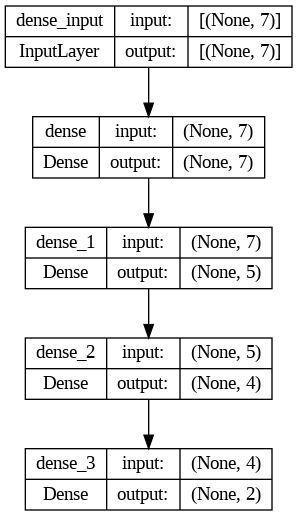

In [ ]:
# Definiamo l'archietettura della rete neurale:
# un primo layer di input con 7 neuroni (perchè ci sono 7 features in input)
# un scondo layer con 5 neuroni
# un ultimo layer con 2 neuroni, poiché la label è un vettore di 2 componenti (es [0, 1])
model = Sequential()
model.add(Dense(7, input_shape=(7,), activation='linear'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='sigmoid'))  # Cambiato il numero di neuroni e la funzione di attivazione

# Compilazione del modello
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['Accuracy'])

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
# Train the model | batch_size= si usa per ridurre gli esempi ditraining con cui lavorare
model.fit(X_train_reti, y_train_reti, epochs=20, batch_size=32, validation_data=(X_test_reti, y_test_reti))

Epoch 1/20
1923/1923 [==============================] - 7s 3ms/step - loss: 0.6266 - Accuracy: 0.6318 - val_loss: 0.4583 - val_Accuracy: 0.5830
Epoch 2/20
1923/1923 [==============================] - 7s 3ms/step - loss: 0.5841 - Accuracy: 0.6664 - val_loss: 0.4981 - val_Accuracy: 0.5710
Epoch 3/20
1923/1923 [==============================] - 5s 3ms/step - loss: 0.5688 - Accuracy: 0.6824 - val_loss: 0.5048 - val_Accuracy: 0.5703
Epoch 4/20
1923/1923 [==============================] - 7s 3ms/step - loss: 0.5485 - Accuracy: 0.6959 - val_loss: 0.5045 - val_Accuracy: 0.5562
Epoch 5/20
1923/1923 [==============================] - 6s 3ms/step - loss: 0.5192 - Accuracy: 0.7196 - val_loss: 0.2108 - val_Accuracy: 0.9050
Epoch 6/20
1923/1923 [==============================] - 8s 4ms/step - loss: 0.3277 - Accuracy: 0.8533 - val_loss: 0.1521 - val_Accuracy: 0.9404
Epoch 7/20
1923/1923 [==============================] - 7s 4ms/step - loss: 0.3101 - Accuracy: 0.8592 - val_loss: 0.2668 - val_Accuracy:

In [ ]:
# Evaluate the model on the test set
score = model.evaluate(X_test_reti, y_test_reti, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.22289805114269257
Test recall: 0.9003491997718811


313/313 [==============================] - 1s 1ms/step

Sensitivity: 91.15890083632019 %

Accuracy: 84.94 %


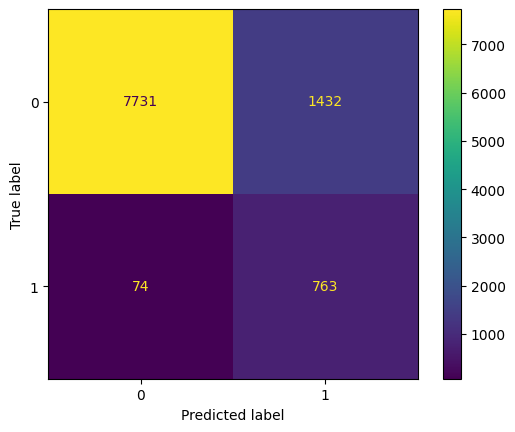

In [ ]:
y_pred_rete = model.predict(X_final_test_set)
y_pred_rete = np.argmax(y_pred_rete, axis = 1)
cm = confusion_matrix(y_final_test_set, y_pred_rete)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
print("\nSensitivity:", ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100, "%")
print("\nAccuracy:", (cm.diagonal().sum() / cm.sum())*100,"%")

## ALBERO

#### FullTree

In [ ]:
X_train_albero = X_train
X_test_albero = X_test
y_test_albero = y_test
y_train_albero = y_train
final_test_set_albero = final_test_set #validation

Dal momento che gli alberi decisionali nella libreria Sklearn impongono che le variabili siano numeriche, faremo una conversione delle variabili categoriche in numeriche.

In [ ]:
label_encoder = LabelEncoder()
for col in ['gender', 'hypertension', 'heart_disease']:
    X_train_albero[col] = label_encoder.fit_transform(X_train_albero[col])
    X_test_albero[col] = label_encoder.transform(X_test_albero[col])
X_train_albero.head()  #0=female, 1=male

,gender,hypertension,heart_disease,age,bmi,HbA1c_level,blood_glucose_level
75125,0,0,0,27,27,6,155
93402,1,0,0,67,36,6,200
99474,1,0,0,27,33,6,100
34410,1,0,0,37,40,4,155
74389,0,0,0,6,17,6,145


In [ ]:
for col in X_train.columns:  #trasformiamo tutte le colonne in numeriche
  X_train_albero[col] = X_train_albero[col].astype(int)
  X_test_albero[col] = X_test_albero[col].astype(int)

Fittiamo il primo albero, ovvero quello completo e come si comporta:

In [ ]:
fulltree = DecisionTreeClassifier(random_state=42)
fulltree.fit(X_train_albero, y_train_albero)

DecisionTreeClassifier(random_state=42)

True negatives = C(0,0)
False negatives = C(1,0)
True positives = C(1,1)
False positives = C(0,1).


Sensibility per la classe 0: 0.9279547897236765

Sensibility per la classe 1: 0.7869777945050809

Accuracy: 0.916063492063492


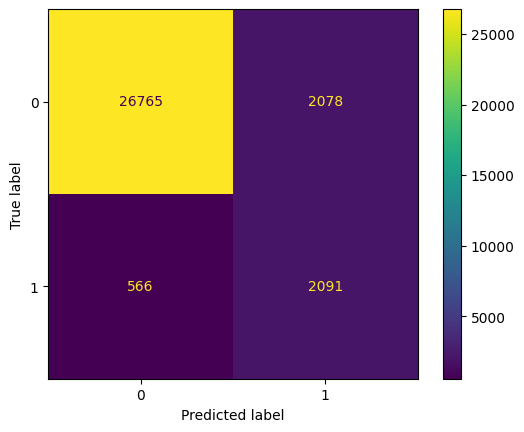

In [ ]:
# predizione del fulltree
y_pred_albero = fulltree.predict(X_test_albero)

cm = confusion_matrix(y_test_albero, y_pred_albero, labels = fulltree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = fulltree.classes_)
disp.plot()
print("\nSensitivity per la classe 0:", cm[0][0] / (cm[0][0]+cm[0][1]))
print("\nSensitivity per la classe 1:", cm[1][1] / (cm[1][1]+cm[1][0]))
print("\nAccuracy:", cm.diagonal().sum() / cm.sum())

In [ ]:
path = fulltree.cost_complexity_pruning_path(X_train_albero, y_train_albero)
ccp_alphas = path.ccp_alphas

#### Param-Grid
Ora eseguiamo una grid-search per vedere i parametri che rendono il nostro albero più performante. Il param-grid è stato runnato su un computer locale in modo da guadagnare tempo, quindi verrà messo come commento così potremo runnare tutto il codice senza questa parte.

In [ ]:
'''### Criterio di split:
splitC = ['gini','entropy', 'log_loss']

### Splitter Strategy:
splitS = ['best','random']

## max depth:
max_depth= list(range(3,6))

risultati_albero = {
    'split_criterior': [],
    'split_stategy':[],
    'max_depth':[],
    'ccp_alphas':[],
    'Sensibility %':[],
    'accuracy':[]
}

start_time = time.time()

total_iterations = len(splitC) * len(splitS) * len(max_depth) * len(ccp_alphas)
iteration_count = 0

for c in splitC:
  for s in splitS:
    for d in max_depth:
      for a in ccp_alphas:
        model = DecisionTreeClassifier(criterion = c, splitter = s, max_depth= d, ccp_alpha = a, random_state=42)
        model.fit(X_train_albero, y_train_albero)
        y_pred_albero = model.predict(X_test_albero)
        cm = confusion_matrix(y_test_albero, y_pred_albero)
        Sens = ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100
        accuratezza = ((cm[1][1]+cm[0][0]) / (cm[1][1]+cm[1][0]+cm[0][1]+cm[0][0]))*100
        risultati_albero['split_criterior'].append(c)
        risultati_albero['split_stategy'].append(s)
        risultati_albero['max_depth'].append(d)
        risultati_albero['ccp_alphas'].append(a)
        risultati_albero['Sensibility %'].append(Sens)
        risultati_albero['accuracy'].append(accuratezza)
        iteration_count += 1
        progress_percentage = (iteration_count / total_iterations) * 100
        tqdm.write(f"Progress: {progress_percentage:.2f}%")

end_time = time.time()
elapsed_time = end_time - start_time

print(f"Time taken for execution: {elapsed_time:.2f} seconds")'''

'### Criterio di split:\nsplitC = [\'gini\',\'entropy\', \'log_loss\']\n\n### Splitter Strategy:\nsplitS = [\'best\',\'random\']\n\n## max depth:\nmax_depth= list(range(3,6))\n\nrisultati_albero = {\n    \'split_criterior\': [],\n    \'split_stategy\':[],\n    \'max_depth\':[],\n    \'ccp_alphas\':[],\n    \'Sensibility %\':[],\n    \'accuracy\':[]\n}\n\nstart_time = time.time()\n\ntotal_iterations = len(splitC) * len(splitS) * len(max_depth) * len(ccp_alphas)\niteration_count = 0\n\nfor c in splitC:\n  for s in splitS:\n    for d in max_depth:\n      for a in ccp_alphas:\n        model = DecisionTreeClassifier(criterion = c, splitter = s, max_depth= d, ccp_alpha = a, random_state=42)\n        model.fit(X_train_albero, y_train_albero)\n        y_pred_albero = model.predict(X_test_albero)\n        cm = confusion_matrix(y_test_albero, y_pred_albero)\n        Sens = ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100\n        accuratezza = ((cm[1][1]+cm[0][0]) / (cm[1][1]+cm[1][0]+cm[0][1]+cm[0][0]))*

In [ ]:
results=pd.read_csv('/content/drive/MyDrive/Magistrale informatica/Machine Learning/ELABORAT0_ML/grid_search_alberi.csv')
results.sort_values(['accuracy'], ascending= False, inplace = True)
results.head(3)

,split_criterior,split_stategy,max_depth,ccp_alphas,precision %,accuracy
0,gini,best,3,0.000000,100.0,96.663492
9155,entropy,best,4,0.000002,100.0,96.663492
9157,entropy,best,4,0.000002,100.0,96.663492


#### Test Finale

Passiamo ora alla fase finale. Alleniamo il modello con la configurazione migliore di parametri e poi andiamo a confrontare le sue preformance con il *final_test_set*.

\Sensibility per la classe 0: 0.9125832151042235
\Sensibility per la classe 1: 0.7060931899641577

Accuracy: 0.8953 %


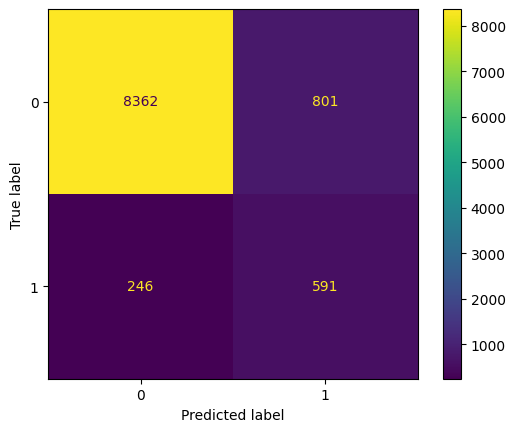

In [ ]:
ALBERONE = DecisionTreeClassifier(criterion = results.split_criterior[0],
                                  splitter = results.split_stategy[0],
                                  max_depth = results.max_depth[0],
                                  ccp_alpha = results.ccp_alphas[0],
                                  random_state=42)
ALBERONE.fit(X_train_albero, y_train_albero)
final_pred_albero = ALBERONE.predict(X_final_test_set)
cm = confusion_matrix(y_final_test_set, final_pred_albero, labels = ALBERONE.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ALBERONE.classes_)
disp.plot()
print("\Sensitivity per la classe 0:", cm[0][0] / (cm[0][0]+cm[0][1]))
print("\Sensitivity per la classe 1:", cm[1][1] / (cm[1][1]+cm[1][0]))
print("\nAccuracy:", cm.diagonal().sum() / cm.sum(), '%')

[]

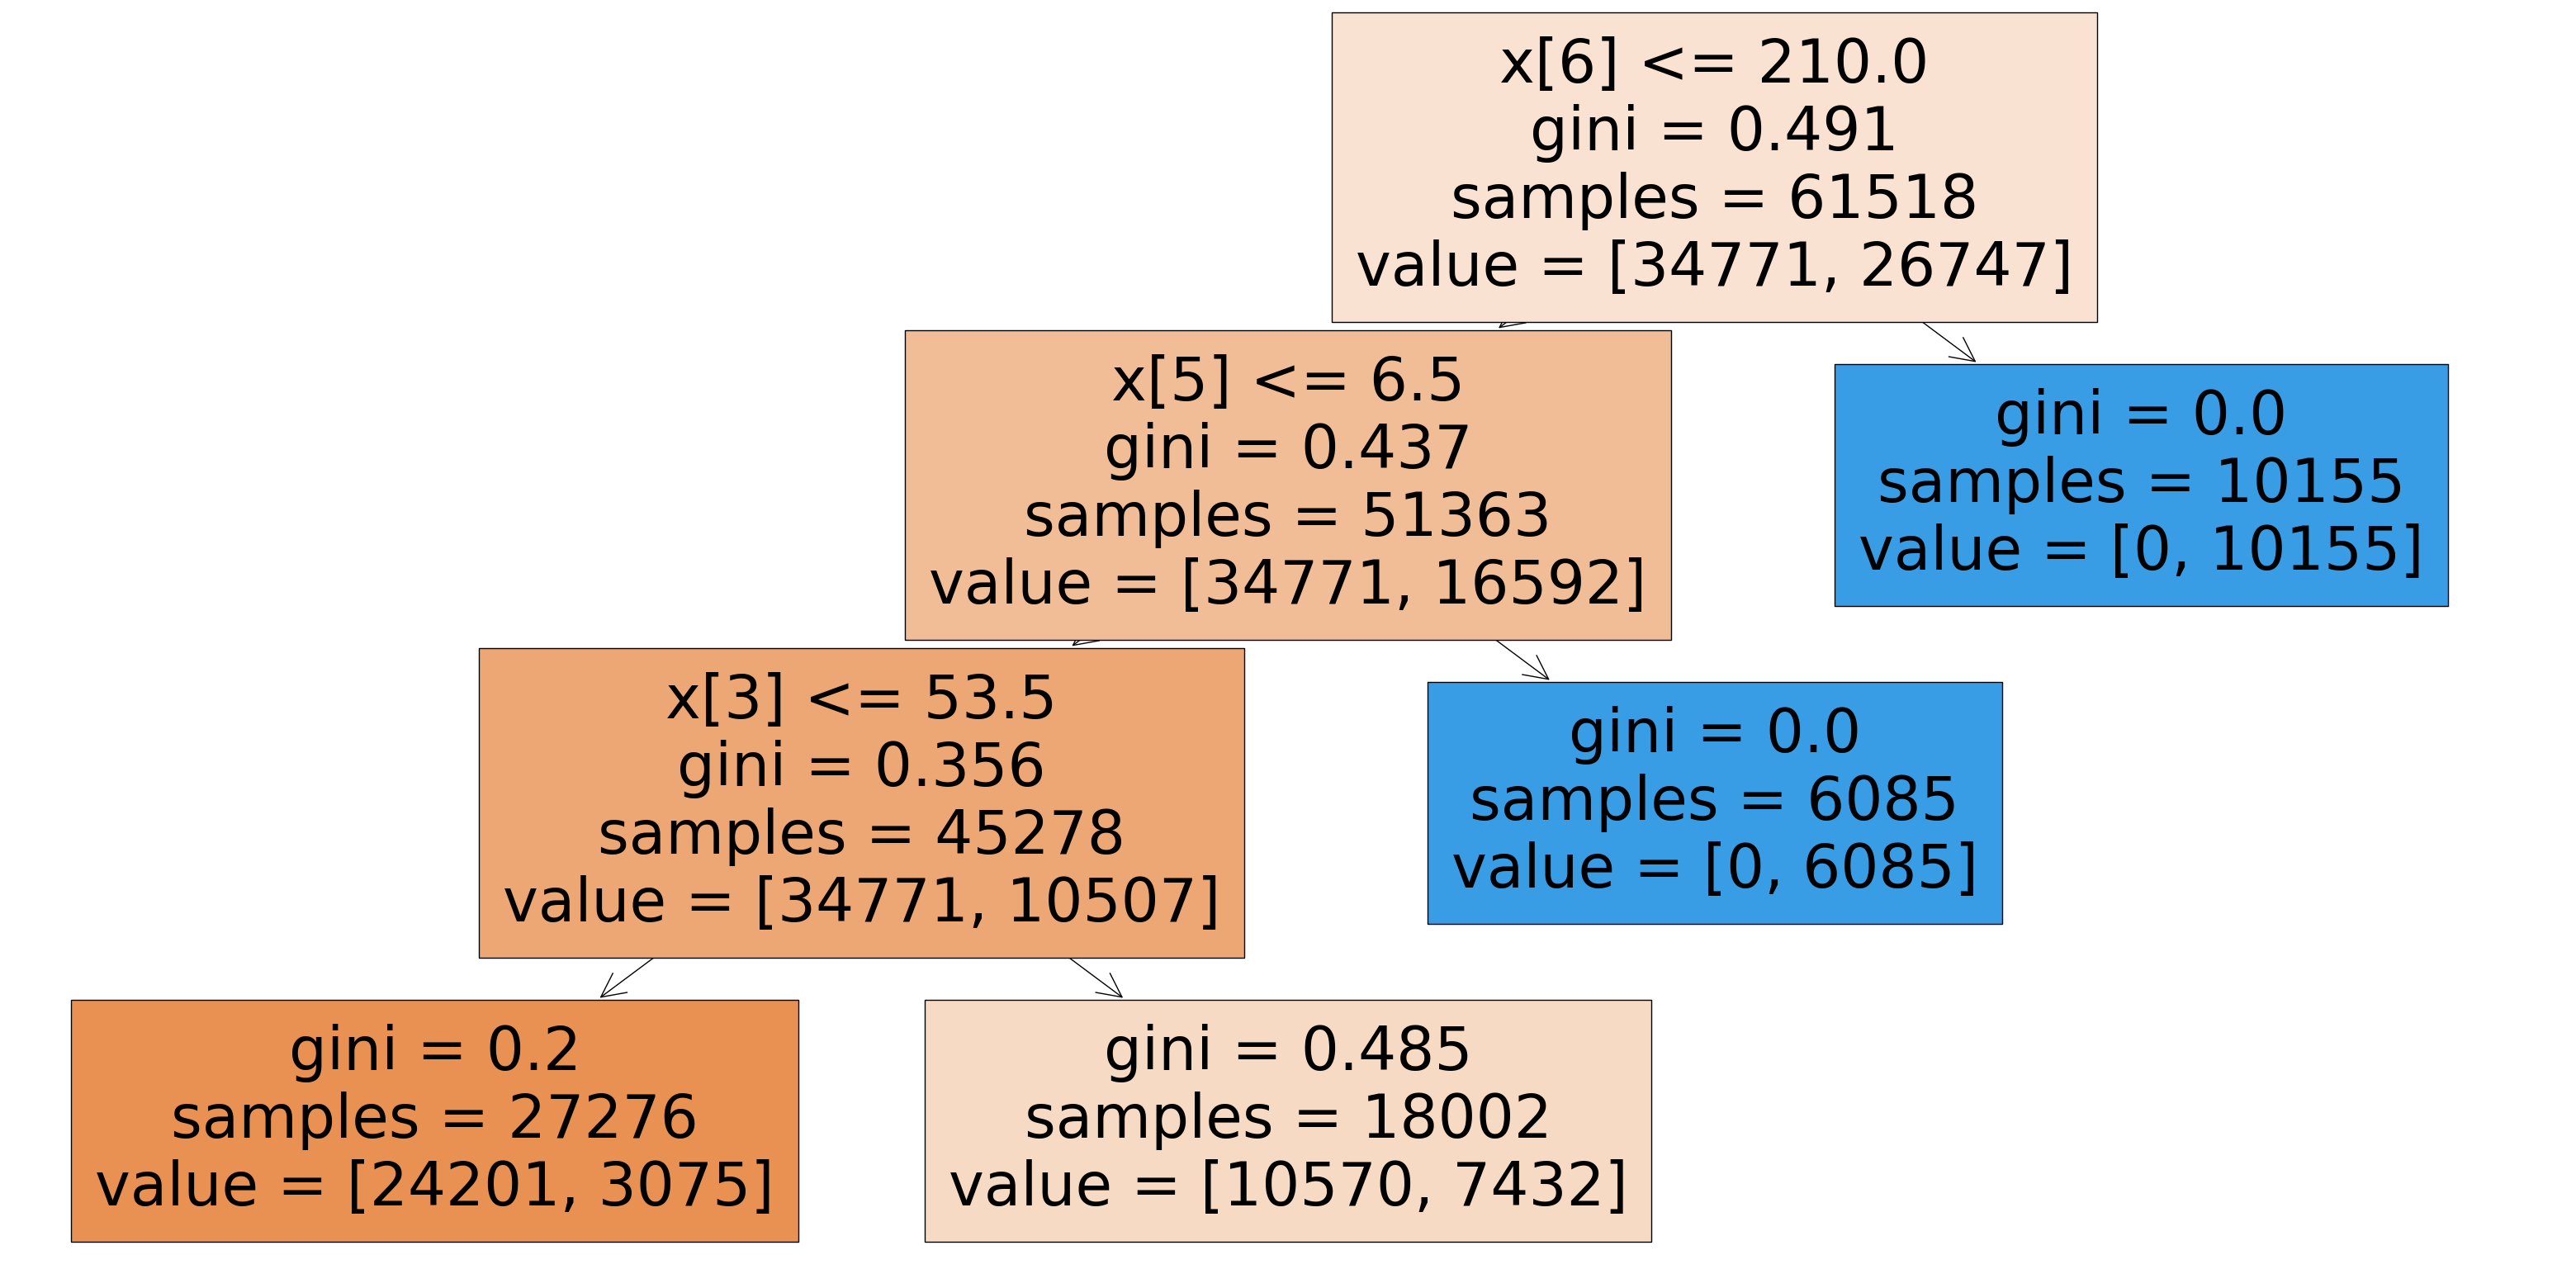

In [ ]:
# Visualizza l'albero decisionale
fig, ax = plt.subplots(figsize=(40, 20))
plot_tree(ALBERONE, filled=True, ax=ax)
plt.plot()

## SVM

#### Prima SVM

In [ ]:
X_train_SVM = X_train
X_test_SVM = X_test
y_test_SVM = y_test
y_train_SVM = y_train
final_test_set_SVM = final_test_set #validation

In [ ]:
X_final_test_set_SVM = final_test_set_SVM[['gender','hypertension','heart_disease','age','bmi','HbA1c_level','blood_glucose_level']]
y_final_test_set_SVM = final_test_set_SVM['diabetes']

In [ ]:
label_encoder = LabelEncoder()
for col in ['gender', 'hypertension', 'heart_disease']:
    X_train_SVM[col] = label_encoder.fit_transform(X_train_SVM[col])
    X_test_SVM[col] = label_encoder.transform(X_test_SVM[col])
    #X_final_test_set_SVM[col] = label_encoder.transform(X_final_test_set_SVM[col])

In [ ]:
y_final_test_set_SVM = y_final_test_set_SVM.ravel()
y_test_SVM = y_test_SVM.ravel()
y_train_SVM = y_train_SVM.ravel()     # Usiamo ravel() per straformare le serie in liste unidimensionali.

In [ ]:
SVM = SVC(C = 1, kernel = 'rbf')
SVM.fit(X_train_SVM, y_train_SVM)

SVC(C=1)

Vediamo come si comporta sul test set:

In [ ]:
prediction_SVM = SVM.predict(X_test_SVM)


Sensibility per la classe 0: 0.8964393440349478

Sensibility per la classe 1: 0.8848325178773052

Accuracy: 0.8954603174603175


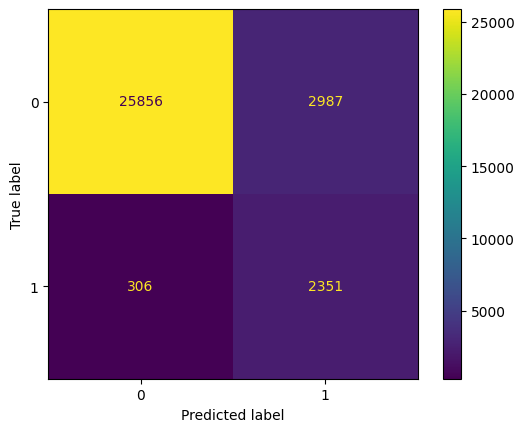

In [ ]:
cm = confusion_matrix(y_test_SVM, prediction_SVM, labels = SVM.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM.classes_)
disp.plot()
print("\nSensitivity per la classe 0:", (cm[0][0]) / (cm[0][0]+cm[0][1]))
print("\nSensitivity per la classe 1:", (cm[1][1]) / (cm[1][1]+cm[1][0]))
print("\nAccuracy:", (cm[1][1] + cm[0][0]) / (cm[1][1]+cm[0][0]+cm[0][1]+cm[1][0]))

#### Param Grid per SVM

Eseguiamo un param grid per la ricerca dei migliori iper parametri su un numero minore di dati:

In [ ]:
'''### Complexity parameter 'Slack variable':
slack = list(range(1, 10000, 200))
slack.append(5)
slack.append(10)
slack.append(20)

### kernel:
kernel = ['poly','rbf','sigmoid']

risultati_SVM = {
    'variabile slack': [],
    'kernel':[],
    'Sensibility %':[],
    'accuracy':[]
}


for k in kernel:
  for c in slack:
        model = SVC(C = c, kernel = k)
        model.fit(X_new_train_SVM, y_new_train_SVM)
        y_pred_SVM = model.predict(X_test_SVM)
        cm = confusion_matrix(y_test_SVM, y_pred_SVM)
        Sens = ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100
        accuratezza = ((cm[1][1]+cm[0][0]) / (cm[1][1]+cm[1][0]+cm[0][1]+cm[0][0]))*100
        risultati_SVM['variabile slack'].append(c)
        risultati_SVM['kernel'].append(k)
        risultati_SVM['Sensibility %'].append(Sens)
        risultati_SVM['accuracy'].append(accuratezza)'''

"### Complexity parameter 'Slack variable':\nslack = list(range(1, 10000, 200))\nslack.append(5)\nslack.append(10)\nslack.append(20)\n\n### kernel:\nkernel = ['poly','rbf','sigmoid']\n\nrisultati_SVM = {\n    'variabile slack': [],\n    'kernel':[],\n    'Sensibility %':[],\n    'accuracy':[]\n}\n\n\nfor k in kernel:\n  for c in slack:\n        model = SVC(C = c, kernel = k)\n        model.fit(X_new_train_SVM, y_new_train_SVM)\n        y_pred_SVM = model.predict(X_test_SVM)\n        cm = confusion_matrix(y_test_SVM, y_pred_SVM)\n        Sens = ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100\n        accuratezza = ((cm[1][1]+cm[0][0]) / (cm[1][1]+cm[1][0]+cm[0][1]+cm[0][0]))*100\n        risultati_SVM['variabile slack'].append(c)\n        risultati_SVM['kernel'].append(k)\n        risultati_SVM['Sensibility %'].append(Sens)\n        risultati_SVM['accuracy'].append(accuratezza)"

In [ ]:
results_SVM=pd.read_csv('/content/drive/MyDrive/Magistrale informatica/Machine Learning/ELABORAT0_ML/grid_search_svm.csv')
results_SVM.sort_values(['accuracy'], ascending= False, inplace = True)
results_SVM= results_SVM[['variabile slack',	'kernel',	'Sensibility %',	'accuracy']]
results_SVM.head(3)

,variabile slack,kernel,Sensibility %,accuracy
102,9801,rbf,80.216216,87.652745
101,9601,rbf,80.216216,87.616268
99,9201,rbf,80.162162,87.598030


In [ ]:
best_configuration_SVM = [results_SVM.iloc[0,1],results_SVM.iloc[0,2]]
best_configuration_SVM

[9801, 'rbf']

#### Modello finale SVM
Andiamo a fittare il modello con la best configuration ottenuta e valutiamola sullo score:

94.98207885304659

Accuracy: 0.8475


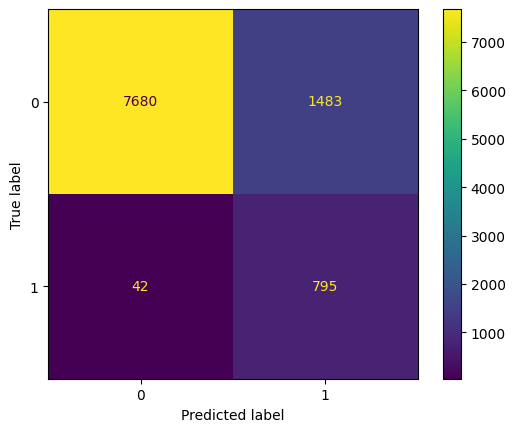

In [ ]:
SVM_finale = SVC(C=best_configuration_SVM[0],kernel=best_configuration_SVM[1]) #C=best_configuration_SVM[0], kernel= best_configuration_SVM[1]
SVM_finale.fit(X_train_SVM, y_train_SVM)
y_pred_SVM = SVM_finale.predict(X_final_test_set_SVM)
cm = confusion_matrix(y_final_test_set_SVM, y_pred_SVM, labels = SVM_finale.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = SVM_finale.classes_)
disp.plot()
Sens = ((cm[1][1]) / (cm[1][1]+cm[1][0]))*100
print(Sens)
print("\nAccuracy:", (cm[1][1] + cm[0][0]) / (cm[1][1]+cm[0][0]+cm[0][1]+cm[1][0]))

## Bontà dei modelli (model checking)
In questa ultima parte andremo a scegliere uno dei 3 modelli proposti tramite le tecniche di performance evaluation viste a lezione.

#### Facciamo le curve ROC

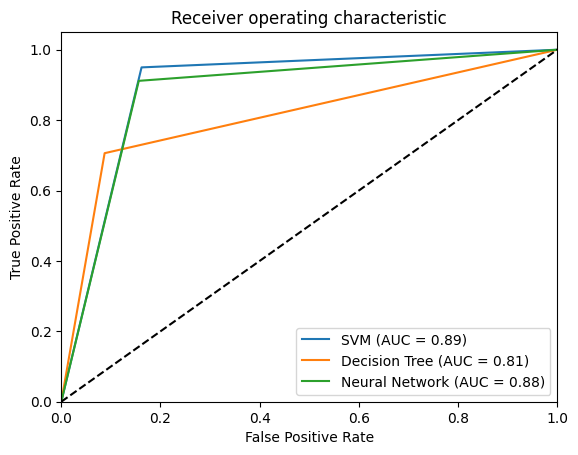

In [ ]:
# Calcola la curva ROC e l'AUC della SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_final_test_set_SVM, y_pred_SVM)
auc_svm = roc_auc_score(y_final_test_set_SVM, y_pred_SVM)

# Calcola la curva ROC e l'AUC dell'Albero
fpr_tree, tpr_tree, thresholds_tree = roc_curve(y_final_test_set, final_pred_albero)
auc_tree = roc_auc_score(y_final_test_set, final_pred_albero)

# Calcola la curva ROC e l'AUC della Rete Neurale
fpr_rete, tpr_rete, thresholds_rete = roc_curve(y_final_test_set, y_pred_rete)
auc_rete = roc_auc_score(y_final_test_set, y_pred_rete)

# Disegna la curva ROC
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Decision Tree (AUC = {auc_tree:.2f})')
plt.plot(fpr_rete, tpr_rete, label=f'Neural Network (AUC = {auc_rete:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()